## About Dataset
Context
This is a small subset of dataset of Book reviews from Amazon Kindle Store category.

Content
5-core dataset of product reviews from Amazon Kindle Store category from May 1996 - July 2014. Contains total of 982619 entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset.
Columns

- asin - ID of the product, like B000FA64PK
- helpful - helpfulness rating of the review - example: 2/3.
- overall - rating of the product.
- reviewText - text of the review (heading).
- reviewTime - time of the review (raw).
- reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
- reviewerName - name of the reviewer.
- summary - summary of the review (description).
- unixReviewTime - unix timestamp.

Acknowledgements
This dataset is taken from Amazon product data, Julian McAuley, UCSD website. http://jmcauley.ucsd.edu/data/amazon/

License to the data files belong to them.

Inspiration
- Sentiment analysis on reviews.
- Understanding how people rate usefulness of a review/ What factors influence helpfulness of a review.
- Fake reviews/ outliers.
- Best rated product IDs, or similarity between products based on reviews alone (not the best idea ikr).
- Any other interesting analysis

In [95]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [96]:
dataset=pd.read_csv("Kindle Reviews/all_kindle_review.csv",index_col=0)
dataset.head()

,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [97]:
dataset=dataset[['reviewText','rating']]
dataset.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [98]:
dataset.isnull().sum()

reviewText    0
rating        0
dtype: int64

In [99]:
dataset['rating'].unique()

array([3, 5, 4, 2, 1])

In [100]:
dataset['rating'].value_counts()

rating
5    3000
4    3000
3    2000
2    2000
1    2000
Name: count, dtype: int64

In [101]:
dataset.shape

(12000, 2)

In [102]:
## preprocessing and clearning
# postive review =1 negative review=0
dataset['rating']=dataset['rating'].apply(lambda x:0 if x<3 else 1)

In [103]:
dataset['rating'].value_counts()

rating
1    8000
0    4000
Name: count, dtype: int64

### pre-processing steps for text processing
- converting to lowercase
- keeping only alphabets
- converting entire review to words
- removing stopwords
- transforming using lemmatization

In [104]:
dataset['reviewText']=dataset['reviewText'].str.lower()

In [105]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup as soup
stopwords=stopwords.words("english")
wnl=wnl()

In [106]:
def process_text(text):
    text=soup(text, 'lxml').get_text()
    text=re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , text)
    text=re.sub(r'[^a-z\s]',' ',text)
    words=word_tokenize(text)
    words=[wnl.lemmatize(word) for word in words if word not in stopwords]
    return " ".join(words)

In [107]:
dataset['reviewText']=dataset['reviewText'].apply(process_text)

In [108]:
dataset.head()

,reviewText,rating
0,jace rankin may short nothing mess man hauled ...,1
1,great short read want put read one sitting sex...,1
2,start saying first four book expecting conclud...,1
3,aggie angela lansbury carry pocketbook instead...,1
4,expect type book library pleased find price right,1


In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset['reviewText'],dataset['rating'],random_state=43,test_size=0.2)

In [147]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9600,), (2400,), (9600,), (2400,))

In [148]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [112]:
corpus=[]
for text in X_train:
    corpus.extend(word_tokenize(text))

In [113]:
len(corpus)

514924

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(max_features=5000,ngram_range=(1,2))
X_train_bow=bow.fit_transform(X_train).toarray()
X_test_bow=bow.transform(X_test).toarray()

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X_train_tfidf=tfidf.fit_transform(X_train).toarray()
X_test_tfidf=tfidf.transform(X_test).toarray()

In [116]:
X_train_tfidf[0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(5000,))

In [117]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [118]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score,classification_report,confusion_matrix

In [119]:
clf.fit(X_train_bow,y_train)
y_pred=clf.predict(X_test_bow)

In [120]:
import seaborn as sns

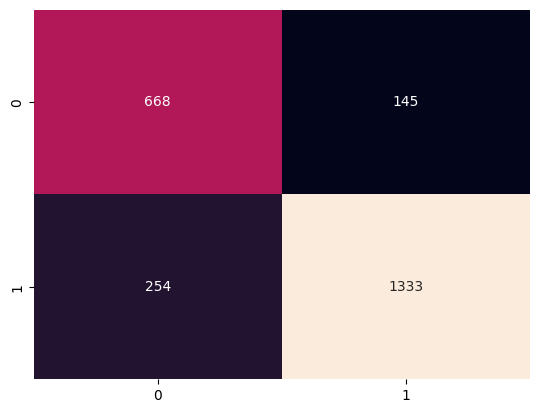

In [121]:
# metric using bow
metrics_bow={
    "accuracy score":accuracy_score(y_test,y_pred),
    "precision score":precision_score(y_test,y_pred),
    "recall score":recall_score(y_test,y_pred),
    "f1 score":f1_score(y_test,y_pred),
    "confusion matrix\n":sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cbar=False,annot=True),
    "classification report\n":classification_report(y_test,y_pred),
}

In [122]:
for key in metrics_bow.keys():
    print(f"{key}  {metrics_bow[key]}")

accuracy score  0.83375
precision score  0.9018944519621109
recall score  0.8399495904221802
f1 score  0.8698205546492659
confusion matrix
  Axes(0.125,0.11;0.775x0.77)
classification report
                precision    recall  f1-score   support

           0       0.72      0.82      0.77       813
           1       0.90      0.84      0.87      1587

    accuracy                           0.83      2400
   macro avg       0.81      0.83      0.82      2400
weighted avg       0.84      0.83      0.84      2400



In [123]:
clf.fit(X_train_tfidf,y_train)
y_pred=clf.predict(X_test_tfidf)

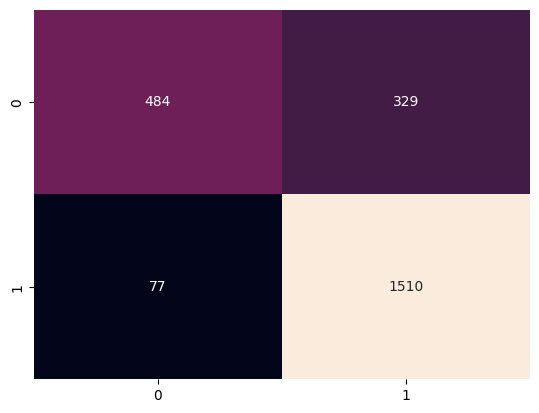

In [124]:
# metric using tfidf
metrics_tfidf={
    "accuracy score":accuracy_score(y_test,y_pred),
    "precision score":precision_score(y_test,y_pred),
    "recall score":recall_score(y_test,y_pred),
    "f1 score":f1_score(y_test,y_pred),
    "confusion matrix\n":sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cbar=False,annot=True),
    "classification report\n":classification_report(y_test,y_pred),
}

In [125]:
for key in metrics_tfidf.keys():
    print(f"{key}  {metrics_tfidf[key]}")

accuracy score  0.8308333333333333
precision score  0.8210984230560087
recall score  0.9514807813484563
f1 score  0.8814944541739638
confusion matrix
  Axes(0.125,0.11;0.775x0.77)
classification report
                precision    recall  f1-score   support

           0       0.86      0.60      0.70       813
           1       0.82      0.95      0.88      1587

    accuracy                           0.83      2400
   macro avg       0.84      0.77      0.79      2400
weighted avg       0.84      0.83      0.82      2400



#### using avg word 2 vev

In [126]:
len(corpus)

514924

In [127]:
from gensim.models import Word2Vec
model=Word2Vec(corpus,vector_size=100,epochs=30)
model.corpus_count

514924

In [149]:
X_train

0              quick read fairly written liked story fond
1       liked book read free kindle book find error pa...
2       since fan reading whatever strike fancy abrupt...
3       great suspense story kept guessing till end st...
4       read review decided give try despite review la...
                              ...                        
9595    thought would quote well known already find re...
9596    really enjoyed story seeker mythical type book...
9597    love fit snugly kindle fire wish cord little l...
9598    great story wonderful girl amazing singing voi...
9599    think writer good idea getting man despair sit...
Name: reviewText, Length: 9600, dtype: object

In [150]:
def tokenize(text):
    return word_tokenize(text)
X_train_transformed=[tokenize(text) for text in np.array(X_train)]
X_test_transformed=[tokenize(text) for text in np.array(X_test)]

In [151]:
train_df = pd.DataFrame({'words': X_train_transformed, 'out': y_train})
train_df['out']=y_train
train_df.head()


,words,out
0,"[quick, read, fairly, written, liked, story, f...",1
1,"[liked, book, read, free, kindle, book, find, ...",1
2,"[since, fan, reading, whatever, strike, fancy,...",1
3,"[great, suspense, story, kept, guessing, till,...",1
4,"[read, review, decided, give, try, despite, re...",0


In [152]:
test_df=pd.DataFrame({'words': X_test_transformed, 'out': y_test})
test_df['out']=y_test
test_df.head()


,words,out
0,"[kind, book, find, exciting, loved, human, ang...",1
1,"[bought, book, read, thought, like, read, like...",1
2,"[loved, cry, sanctuary, read, book, couple, ho...",1
3,"[love, looking, quick, tale, lust, lot, sexual...",0
4,"[kidnapped, thought, kid, sister, effort, keep...",1


In [153]:
# transforming the input using avg word 2 vec
def transform_to_avgW2V(words):
    valid_vecs = [model.wv[w] for w in words if w in model.wv]

    if not valid_vecs:      # no known words
        return None         # or zeros

    return np.mean(valid_vecs, axis=0).tolist()

In [154]:
train_df['words']=train_df['words'].apply(transform_to_avgW2V)
train_df.isnull().sum()

words    8407
out         0
dtype: int64

In [155]:
train_df.dropna(axis=0,inplace=True)
train_df.isnull().sum()

words    0
out      0
dtype: int64

In [156]:
test_df['words']=test_df['words'].apply(transform_to_avgW2V)
test_df.isnull().sum()

words    2089
out         0
dtype: int64

In [158]:
test_df.dropna(axis=0,inplace=True)
test_df.isnull().sum()

words    0
out      0
dtype: int64

In [160]:
train_df.columns=['vector','target']
test_df.columns=['vector','target']

In [165]:
X_train=np.array(train_df['vector'].tolist())
y_train=train_df['target'].values

In [167]:
X_test=np.array(test_df['vector'].tolist())
y_test=test_df['target'].values

In [140]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_jobs=-1,verbose=1)

In [168]:
X_train.shape

(1193, 100)

In [169]:
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [170]:
y_pred=clf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


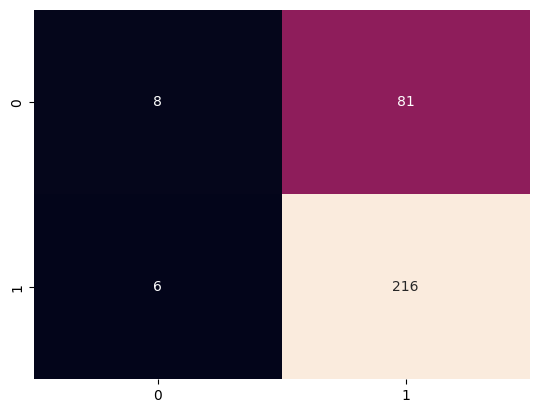

In [171]:
# metric using avg_w2v
metrics_avg_w2v={
    "accuracy score":accuracy_score(y_test,y_pred),
    "precision score":precision_score(y_test,y_pred),
    "recall score":recall_score(y_test,y_pred),
    "f1 score":f1_score(y_test,y_pred),
    "confusion matrix\n":sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cbar=False,annot=True),
    "classification report\n":classification_report(y_test,y_pred),
}

In [172]:
for key in metrics_avg_w2v.keys():
    print(f"{key}  {metrics_avg_w2v[key]}")

accuracy score  0.7202572347266881
precision score  0.7272727272727273
recall score  0.972972972972973
f1 score  0.8323699421965318
confusion matrix
  Axes(0.125,0.11;0.775x0.77)
classification report
                precision    recall  f1-score   support

           0       0.57      0.09      0.16        89
           1       0.73      0.97      0.83       222

    accuracy                           0.72       311
   macro avg       0.65      0.53      0.49       311
weighted avg       0.68      0.72      0.64       311

